In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
def check_convergencia(deltaT,deltaX,K):
    if((deltaT/(deltaX**2)) < (1/(4*K))):
        return deltaT
    else:
        print("Mudando deltaT para: ",((1/4*K)*(deltaX**2))*0.4)
        return ((1/4*K)*(deltaX**2))*0.4

In [3]:
%matplotlib notebook


K = 1
Qp = 80
alpha = 1
n = 10 #Numero do grupo pq sim

tolerance = 1e-2


deltaT = 0.05
deltaX = 0.5 #2e-2
deltaY = deltaX

p = (int((n/1.4)/deltaX),int((60/(n+5)/deltaY)))
p= (30,30)
X = np.arange(0,30+deltaX,deltaX)
Y = np.arange(0,30+deltaY,deltaY)
deltaT = check_convergencia(deltaT,deltaX,K)
t = np.arange(0,5+deltaT,deltaT)
print("Lenx {} LenY {} Lent {}".format(len(X),len(Y),len(t)))
print(p)
nodeMatrix = np.zeros(shape =(len(X), len(Y)))
nodeMatrix[:,0] = nodeMatrix[:,1]
nodeMatrix[:,-1] = 0
nodeMatrix[0,:] = 0
nodeMatrix[-1,:] = 0

Lenx 61 LenY 61 Lent 101
(30, 30)


In [4]:
def check_convergencia(deltaT,deltaX,K):
    if((deltaT/(deltaX**2)) < (1/(4*K))):
        return deltaT
    else:
        print("Mudando deltaT para: ",((1/4*K)*(deltaX**2))*0.4)
        return ((1/4*K)*(deltaX**2))*0.4

def func_u(x,y):
    return(alpha)
def func_v(x,y):
    return alpha*np.sin(np.pi*x/5)

def d1_central(prox,ant,delta):
    return (prox-ant)/(2*delta)

def d2_central(prox,ant,atual,delta):
    return (prox - 2*(atual) + ant)/(delta**2)

def tutti(u , v, meio , cima, baixo, esquerda, direita):
    total = K*d2_central(direita,esquerda,meio,deltaX)
    total+= K*d2_central(baixo,cima,meio, deltaY)
    total-= u*d1_central(direita, esquerda, deltaX)
    total-= v*d1_central(baixo, cima, deltaY)
    return meio + (total*deltaT)

In [5]:
def calcDiff2D(nodes):
    nodes_t = nodes.copy()
    for i in range(1, len(nodes)-1):
        for j in range(1,len(nodes[0])-1):
            if(j==1):
                nodes[i][j-1] = nodes[i][j+1]
            if(i==len(nodes[0])-2):
                nodes[i][j+1] = nodes[i][j-1]
            if(i==1):
                nodes[i-1][j] = nodes[i+1][j]
            if(i==len(nodes)-2):
                nodes[i+1][j] = nodes[i-1][j]
                #alpha*np.sin(np.pi*X[j]/5)
            nodes_t[i][j] = tutti(alpha , 0 ,nodes[i][j], nodes[i-1][j], nodes[i+1][j],nodes[i][j-1],nodes[i][j+1])
            if(nodes_t[i][j] < 0):
                nodes_t[i][j] = 0
    return nodes_t

In [6]:
def run_sim(nodes_ref, time, Qp_time):
    for l in range(len(t)):
        #if(not l%10):
        image = plt.imshow(nodes_ref,animated=True,cmap="viridis",interpolation="bilinear",vmin=0, vmax=1)
        
        g_images.append([image])
        if(Qp_time > time[l]):
            nodes_ref[p[1]][p[0]] = (Qp/10)/(deltaX*deltaY)
            
        #print(nodes_ref[40][40])
        nodes_ref = calcDiff2D(nodes_ref)

<IPython.core.display.Javascript object>


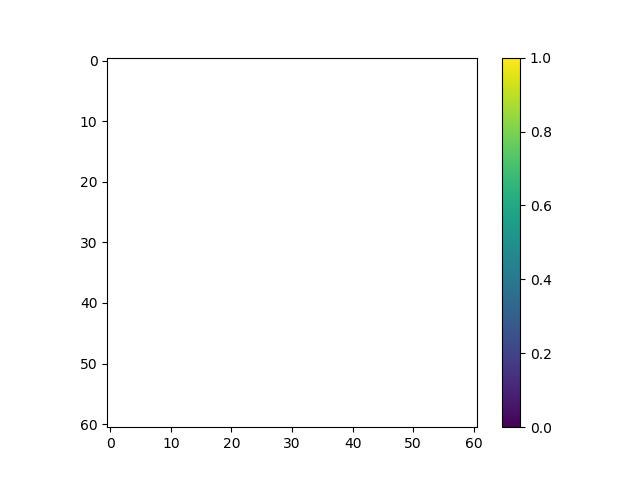

In [7]:
FFwriter = animation.FFMpegWriter(fps = 30)
plt.rcParams['animation.ffmpeg_path'] ='ffmpeg.exe'
figh = plt.figure()

g_images = []

run_sim(nodeMatrix, t, 2)
plt.colorbar()
ani = animation.ArtistAnimation(figh, g_images, interval=50, blit=True, repeat_delay=1000)

#ani.save("figure.mp4", writer=FFwriter)

plt.show()

In [8]:
ani.save("figure.mp4", writer=FFwriter)

In [9]:
print(nodeMatrix[40][40])

0.0
